In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)

In [3]:
survey_data = pd.read_csv('C:/python/data/survey_results_public.csv',index_col = 'ResponseId')
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [4]:
survey_data_sche = pd.read_csv('C:/python/data/survey_results_schema.csv',index_col ='qname')['question']
survey_data_sche

qname
S0                      <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                                Browser Meta Info
S1                      <span style="font-size:22px; font-family: aria...
MainBranch              Which of the following options best describes ...
Employment              Which of the following best describes your cur...
RemoteWork              Which best describes your current work situation?
CodingActivities        Which of the following best describes the code...
S2                      <span style="font-size:22px; font-family: aria...
EdLevel                 Which of the following best describes the high...
LearnCode               How did you learn to code? Select all that apply.
LearnCodeOnline         What online resources do you use to learn to c...
LearnCodeCoursesCert    What online courses or certifications do you u...
YearsCode               Including any education, how many years have y...
YearsCodePro            NOT incl

In [5]:
survey_data_sche['CompTotal']

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [6]:
survey_data_sche['CompFreq']

'Is that compensation weekly, monthly, or yearly?'

In [7]:
survey_data_sche.info()

<class 'pandas.core.series.Series'>
Index: 79 entries, S0 to TrueFalse_3
Series name: question
Non-Null Count  Dtype 
--------------  ----- 
79 non-null     object
dtypes: object(1)
memory usage: 3.3+ KB


In [8]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그래밍경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [9]:
survey_df = survey_data[selected_columns].copy()
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [10]:
print(survey_data_sche['YearsCode'])

Including any education, how many years have you been coding in total?


In [11]:
survey_df['Country'].isna()

ResponseId
1         True
2        False
3        False
4        False
5        False
         ...  
73264    False
73265    False
73266    False
73267    False
73268    False
Name: Country, Length: 73268, dtype: bool

In [12]:
def count_nan(Series):
    
    return np.sum(Series.isnull())

In [13]:
count_nan(survey_df['Country'])

1497

In [14]:
count_nan(survey_df['YearsCode'])

1937

In [15]:
#Series.replace(변경 전의 값, 변경 후의 값, inplace=True)
survey_df['YearsCode'].replace('Less than 1 year',0,inplace=True)
survey_df['YearsCode'].replace('More than 50 years',51,inplace=True)
survey_df['YearsCode'] = survey_df['YearsCode'].astype('float')
print(survey_df['YearsCode'].dtypes)
survey_df['YearsCode'].unique()

float64


array([nan, 14., 20.,  8., 15.,  3.,  1.,  6., 37.,  5., 12., 22., 11.,
        4.,  7., 13., 36.,  2., 25., 10., 40., 16., 27., 24., 19.,  9.,
       17., 18., 26., 51., 29., 30., 32.,  0., 48., 45., 38., 39., 28.,
       23., 43., 21., 41., 35., 50., 33., 31., 34., 46., 44., 42., 47.,
       49.])

In [16]:
print(survey_data_sche['YearsCodePro'])

NOT including education, how many years have you coded professionally (as a part of your work)?


In [17]:
survey_df['YearsCodePro'].replace('Less than 1 year',0,inplace=True)
survey_df['YearsCodePro'].replace('More than 50 years',51,inplace=True)
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].astype('float')
print(survey_df['YearsCodePro'].dtypes)
survey_df['YearsCodePro'].unique()

float64


array([nan,  5., 17.,  3.,  6., 30.,  2., 10., 15.,  4., 22., 20., 40.,
        9., 14., 21.,  7., 18., 25.,  8., 12., 45.,  1., 19., 28., 24.,
       11., 23.,  0., 32., 27., 16., 44., 26., 37., 46., 13., 31., 39.,
       34., 38., 35., 29., 42., 36., 33., 43., 41., 48., 50., 51., 47.,
       49.])

In [18]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [19]:
# survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce') coerce: 에러들을 Nan으로 처리해주세요.

In [20]:
survey_df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [23]:
# contains(): 특정 문자 값이 포함 되었는지 , na 키워드를 활용하면 Nan 값을 대신할 값을 넣을 수 있습니다./ where: where은 Dataframe 원하는 컬럼에 조건을 설정해 해당하는 데이터행의 값만 출력합니다.
survey_df.where(~(survey_df['Gender'].str.contains(';', na=False)),np.nan, inplace=True) # ~으로 반전을 시켜준 것. where절에서는 조건이 참인것들을 제외하고 Nan으로 바꿔줌. 그래서 contains로 찾아오는게 True로 가져오므로 반전시켜줘서 처리를 해주었음, 결측값표시하지 않고싶으면 drona()를 뒤에 붙여줌

In [25]:
survey_df.Gender.unique()

array([nan, 'Man', 'Or, in your own words:', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Prefer not to say'], dtype=object)

In [26]:
survey_df.Gender.value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [71]:
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size']=14
mpl.rcParams['figure.figsize']=(9,5)
mpl.rcParams['figure.facecolor']='#00000000' #배경색=흰 색

In [72]:
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

Black And White Picture
Noto Serif Ahom


In [73]:
mpl.rcParams['font.family']='Black And white Picture'
print(mpl.rcParams['font.family'])

['Black And white Picture']


In [74]:
mpl.rcParams['axes.unicode_minus']=False

In [75]:
survey_df.Country.unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [76]:
survey_df.Country.nunique()

180

In [77]:
survey_df.Country.value_counts()[:15].index

Index(['United States of America', 'India', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'France', 'Brazil', 'Poland', 'Netherlands', 'Spain', 'Italy',
       'Australia', 'Russian Federation', 'Turkey', 'Sweden'],
      dtype='object')

In [78]:
survey_df.Country.unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

Text(0, 0.5, '응답자의 수')

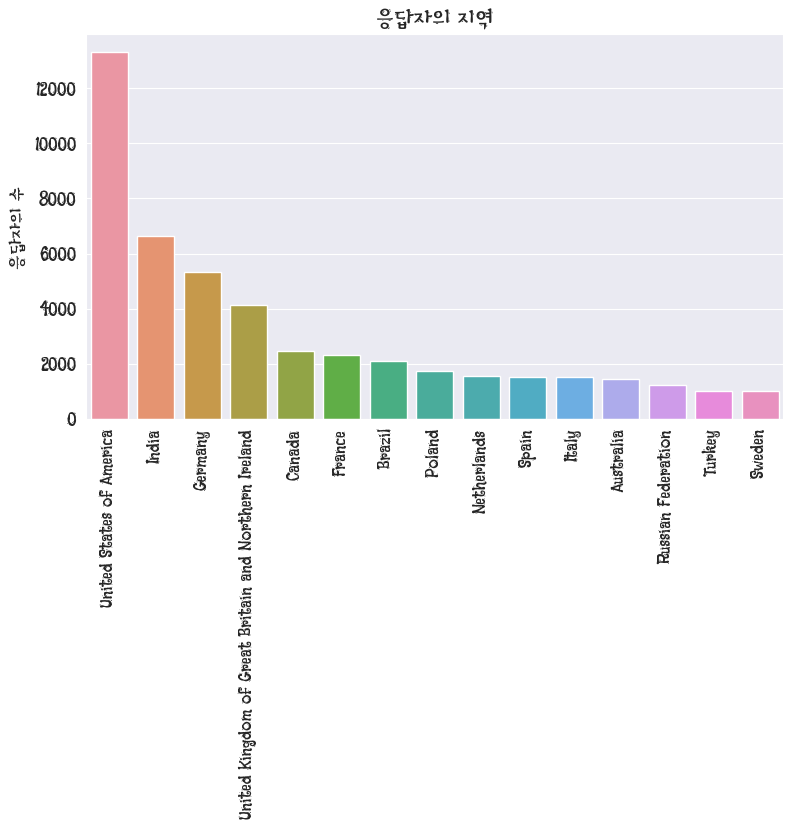

In [79]:
plt.title('응답자의 지역')
sns.barplot(x=survey_df.Country.value_counts()[:15].index,y=survey_df.Country.value_counts()[:15])
plt.xticks(rotation=90)
plt.ylabel('응답자의 수')

Text(0, 0.5, '응답자의 수')

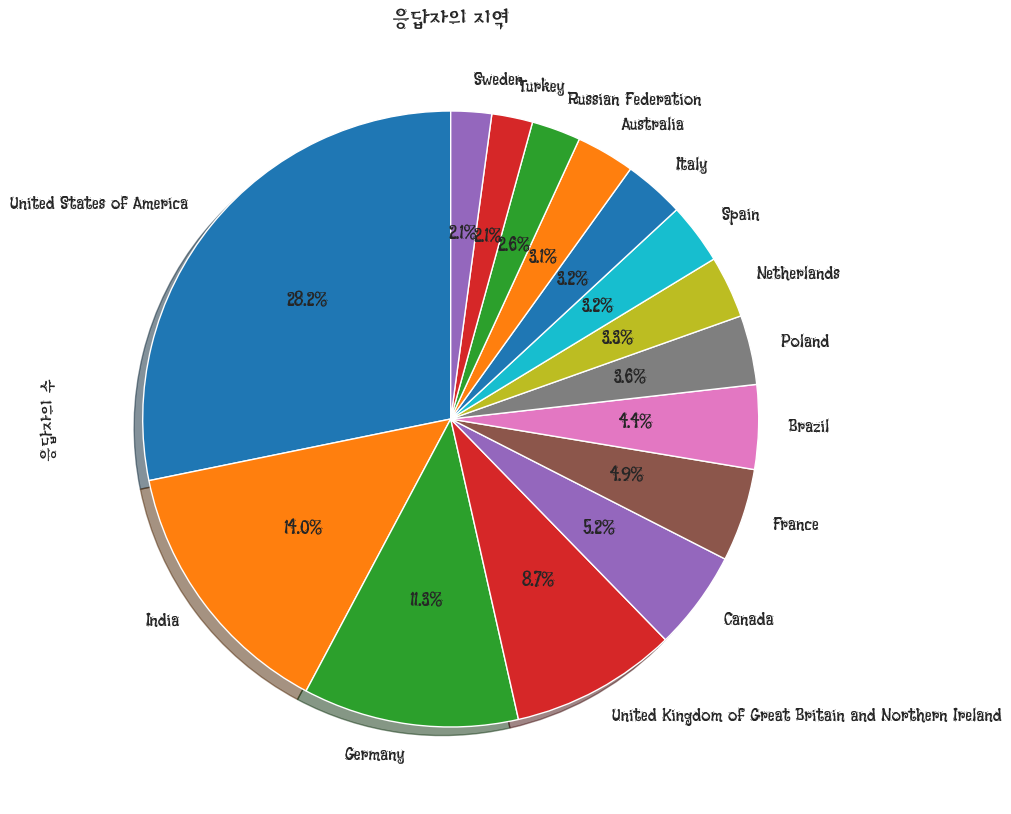

In [80]:
plt.figure(figsize=(12,10))
plt.title('응답자의 지역')
plt.pie(x=survey_df.Country.value_counts()[:15],labels=[_ for _ in survey_df.Country.value_counts()[:15].index], autopct = "%1.1f%%",startangle = 90,shadow=True)
plt.xticks()
plt.ylabel('응답자의 수')

In [81]:
age_counts = survey_df.Age.value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

Text(0, 0.5, '응답자의 수')

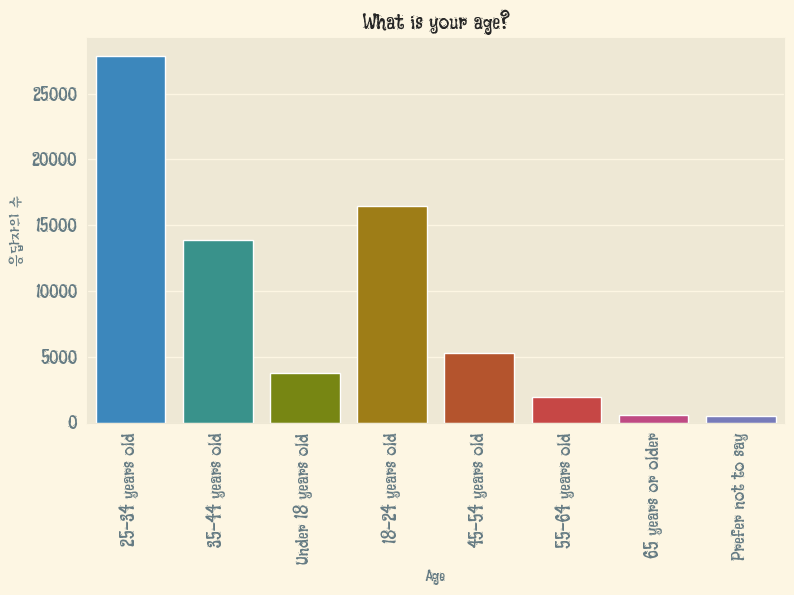

In [102]:
plt.title(survey_data_sche['Age'])
sns.countplot(data=survey_df, x='Age')
plt.xticks(rotation=90)
plt.ylabel('응답자의 수')

Text(0, 0.5, '응답자의 수')

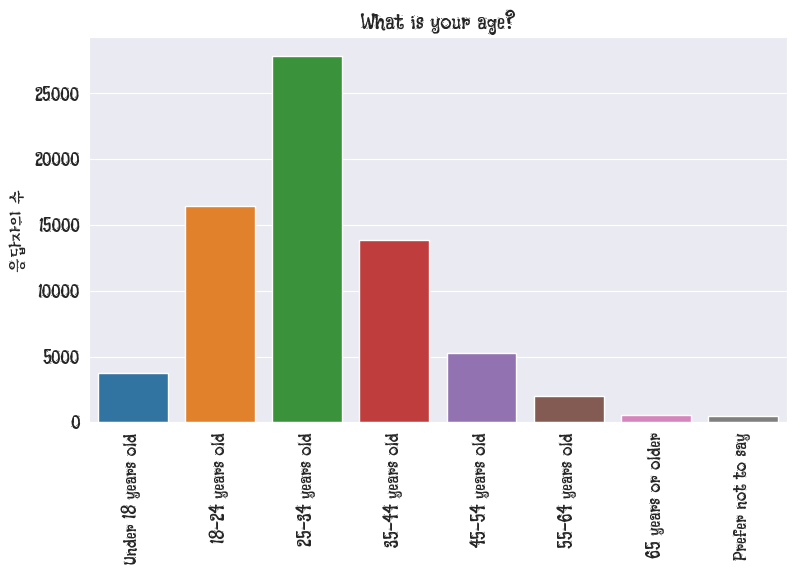

In [82]:
order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
plt.title(survey_data_sche['Age'])
sns.barplot(x=survey_df.Age.value_counts().index,y=survey_df.Age.value_counts(),order=order)
plt.xticks(rotation=90)
plt.ylabel('응답자의 수')

Text(0, 0.5, '응답자의 수')

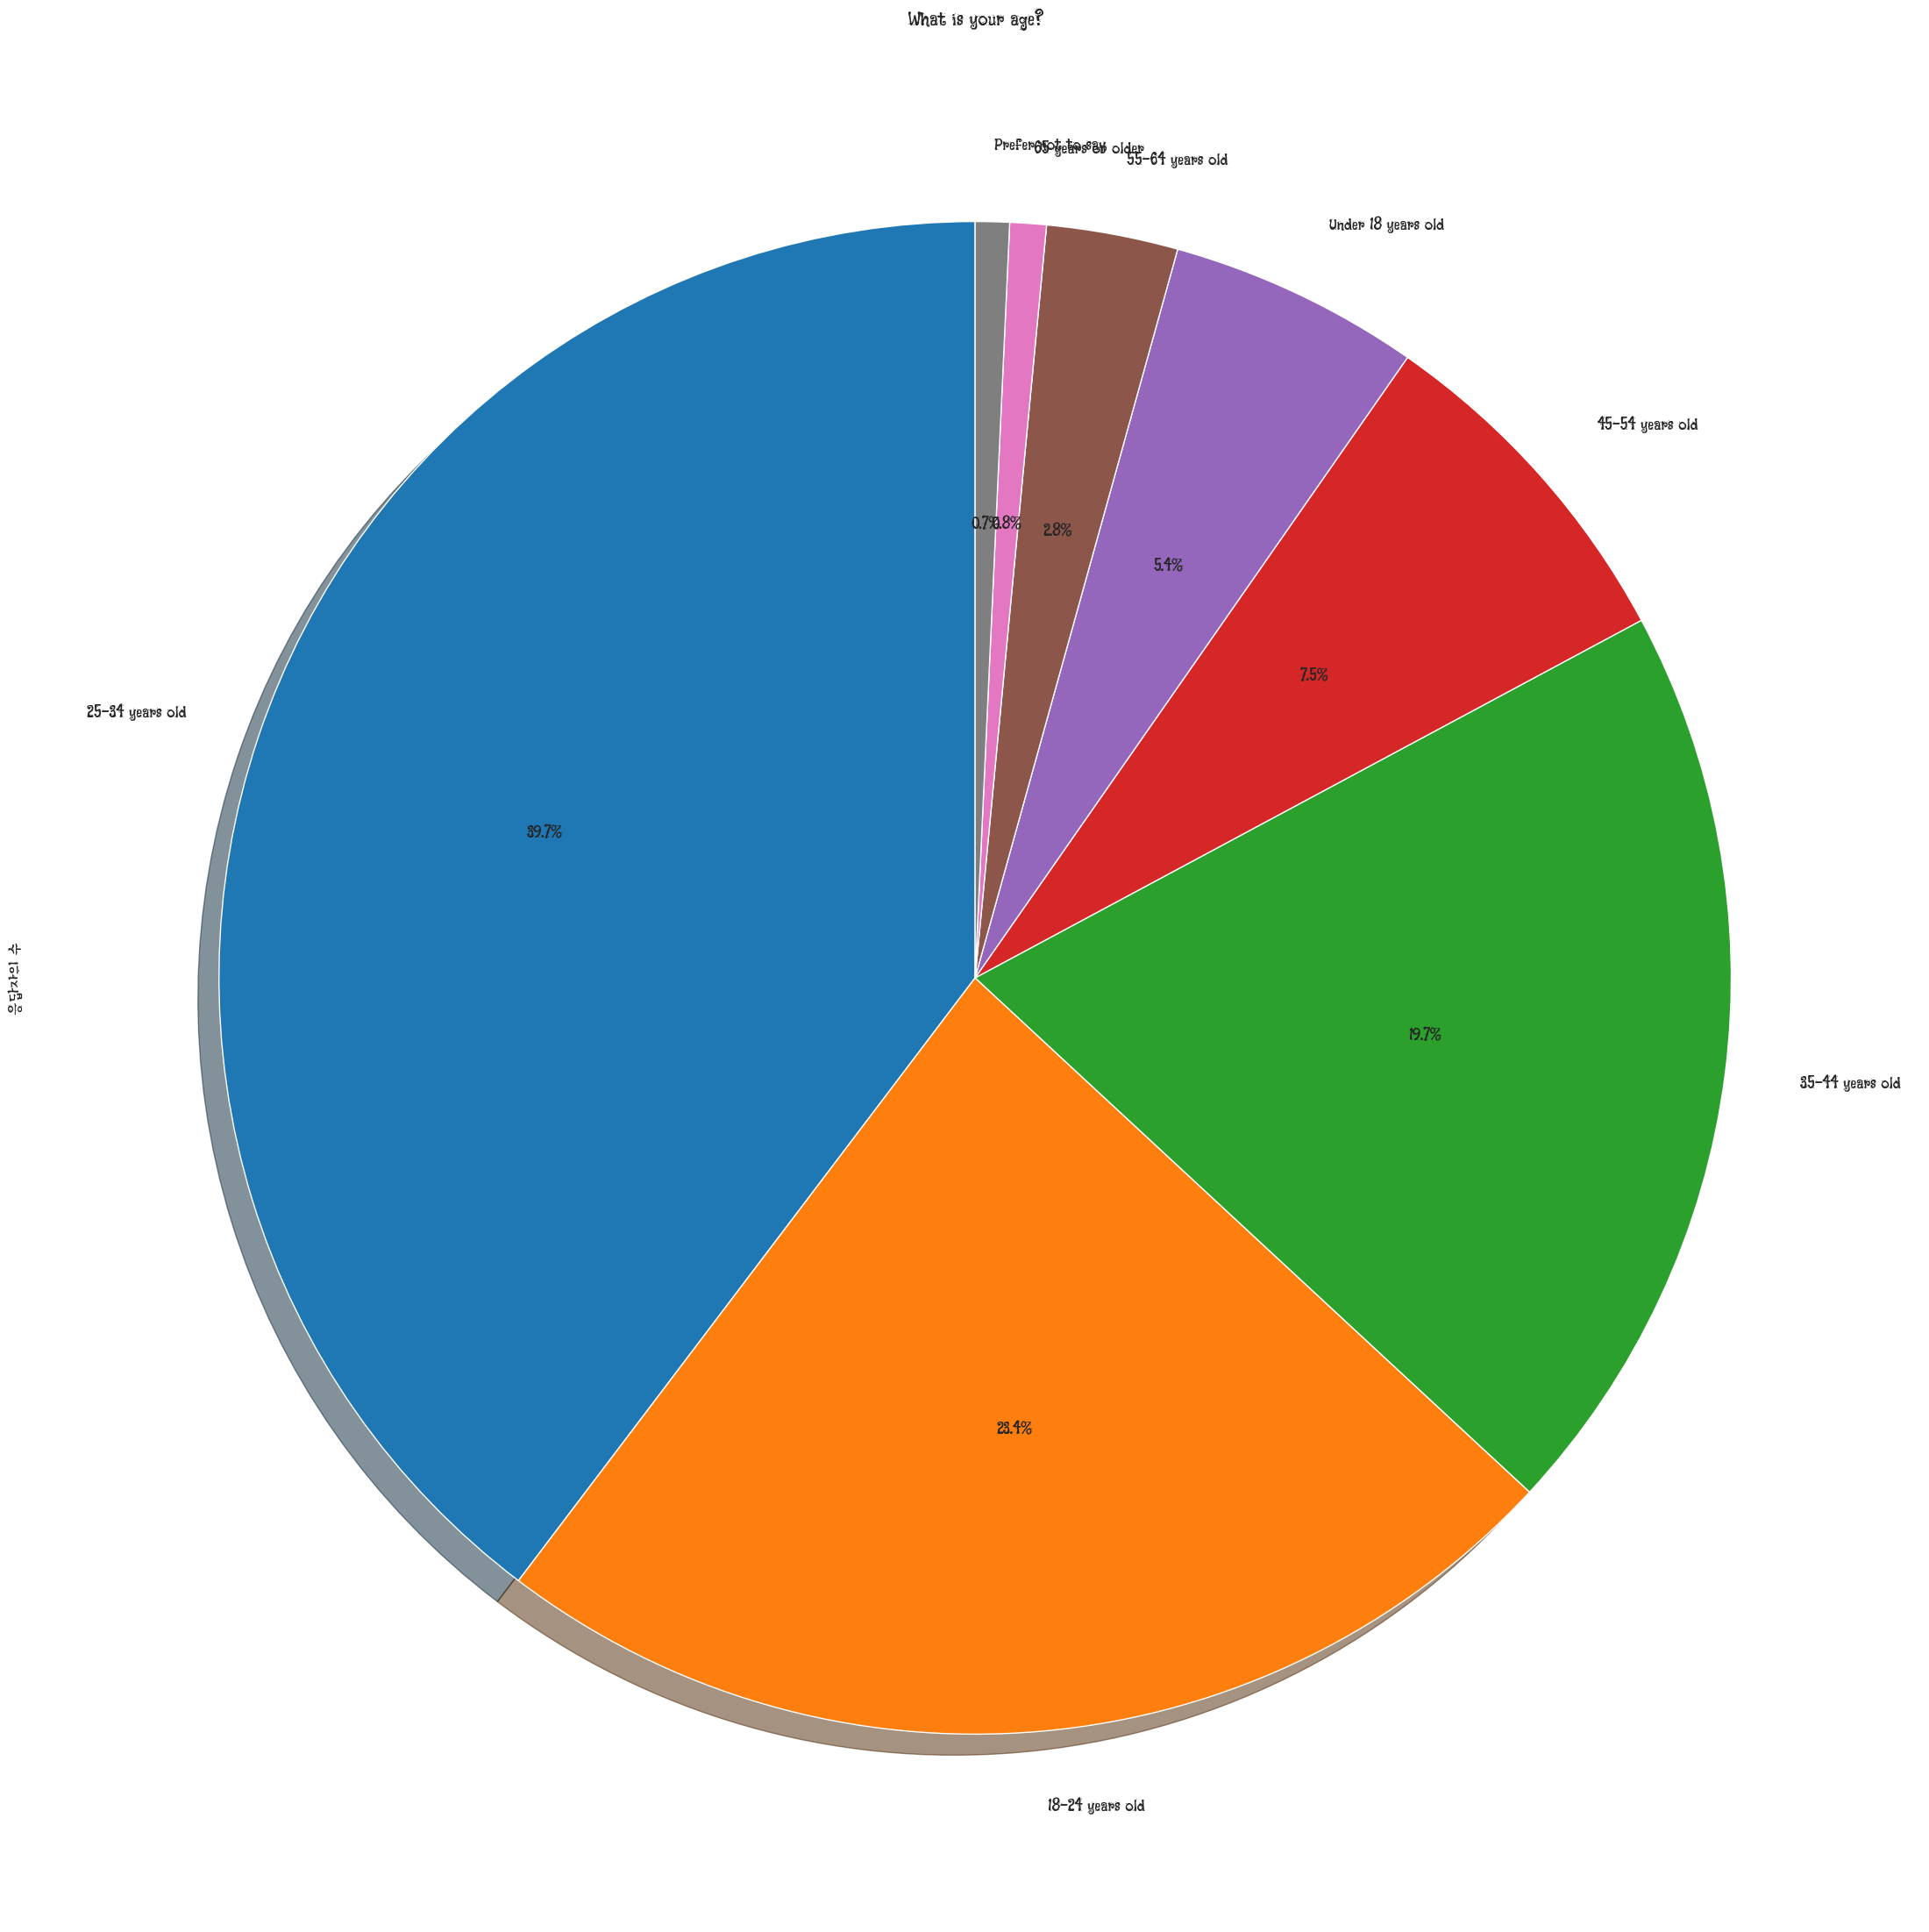

In [83]:
plt.figure(figsize=(28,28))
plt.title(survey_data_sche['Age'])
plt.pie(x=survey_df.Age.value_counts(),labels=[_ for _ in survey_df.Age.value_counts().index], autopct = "%1.1f%%",startangle = 90,shadow=True)
plt.xticks(rotation=90)
plt.ylabel('응답자의 수')

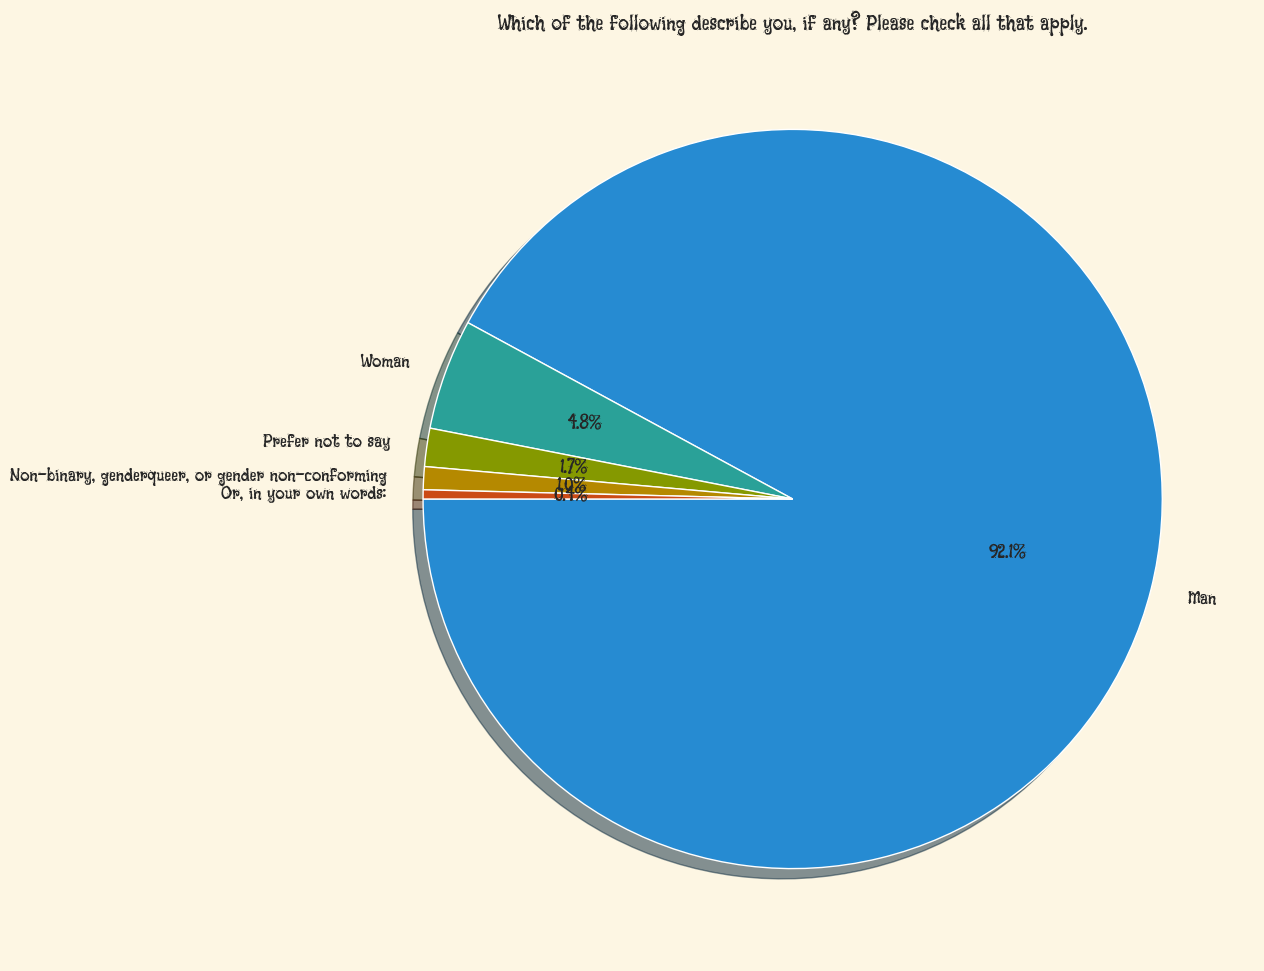

In [94]:
plt.figure(figsize=(14,12))
plt.title(survey_data_sche['Gender'])
plt.pie(x=survey_df.Gender.value_counts(),labels=[_ for _ in survey_df.Gender.value_counts().index], autopct = "%1.1f%%",startangle = 180,shadow=True)
plt.show()

In [89]:
# matplotlib에서 적용할 수 있는 style 목록 조회
print(plt.style.available)
# style의 적용
plt.style.use('Solarize_Light2')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [92]:
survey_df.Gender.value_counts().index

Index(['Man', 'Woman', 'Prefer not to say',
       'Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:'],
      dtype='object')

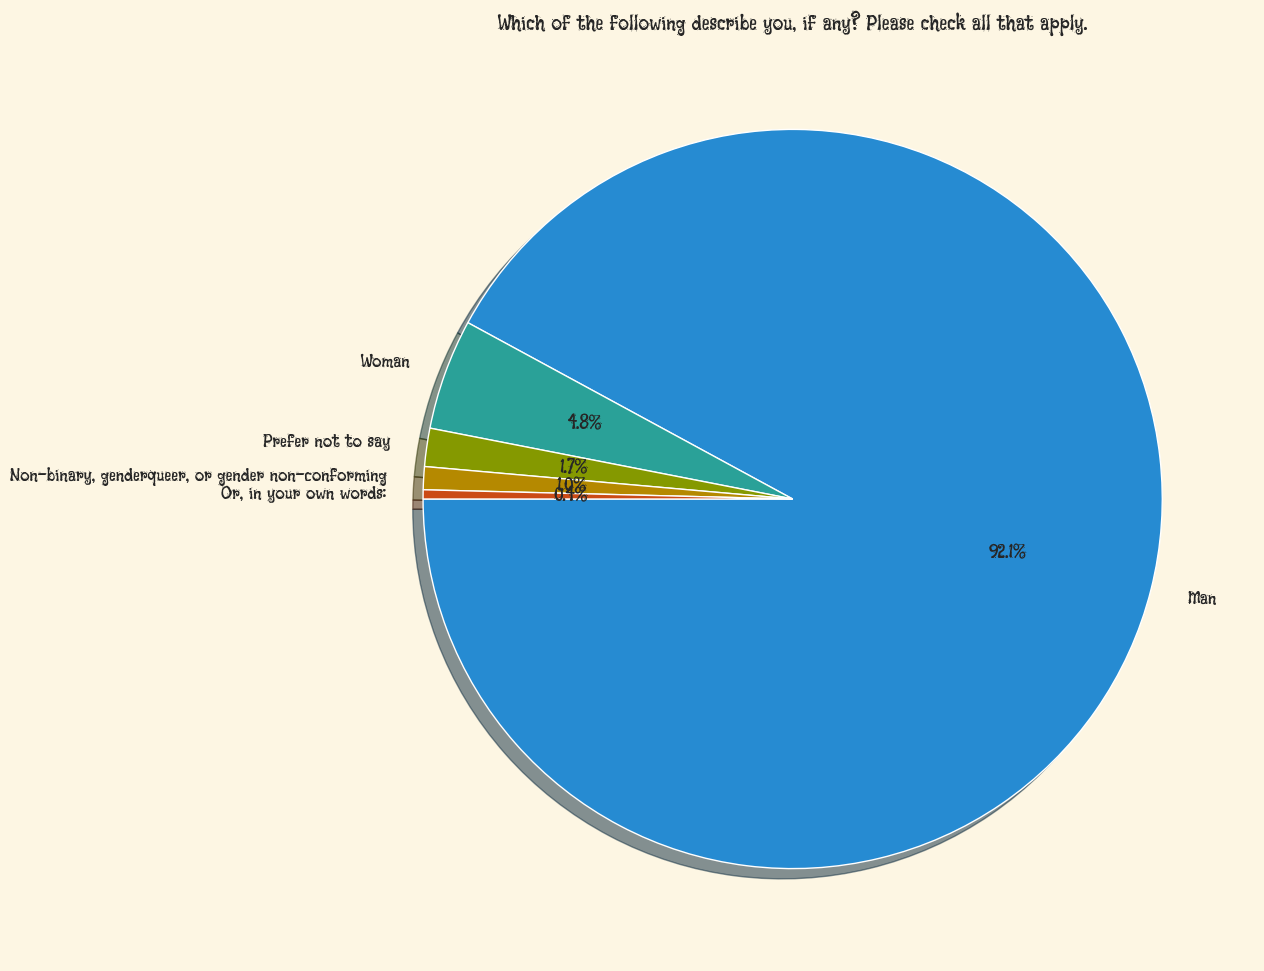

In [93]:
plt.figure(figsize=(14,12))
plt.title(survey_data_sche['Gender'])
plt.pie(x=survey_df.Gender.value_counts(),labels=[_ for _ in survey_df.Gender.value_counts().index], autopct = "%1.1f%%",startangle = 180,shadow=True)
plt.show()

In [91]:
# axes만 색상 변경하는 법
# plt.style.use("default") 로 변경해줘야 함
#mpl.rcParams["axes.facecolor"] = "white"

In [95]:
survey_data_sche['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [96]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

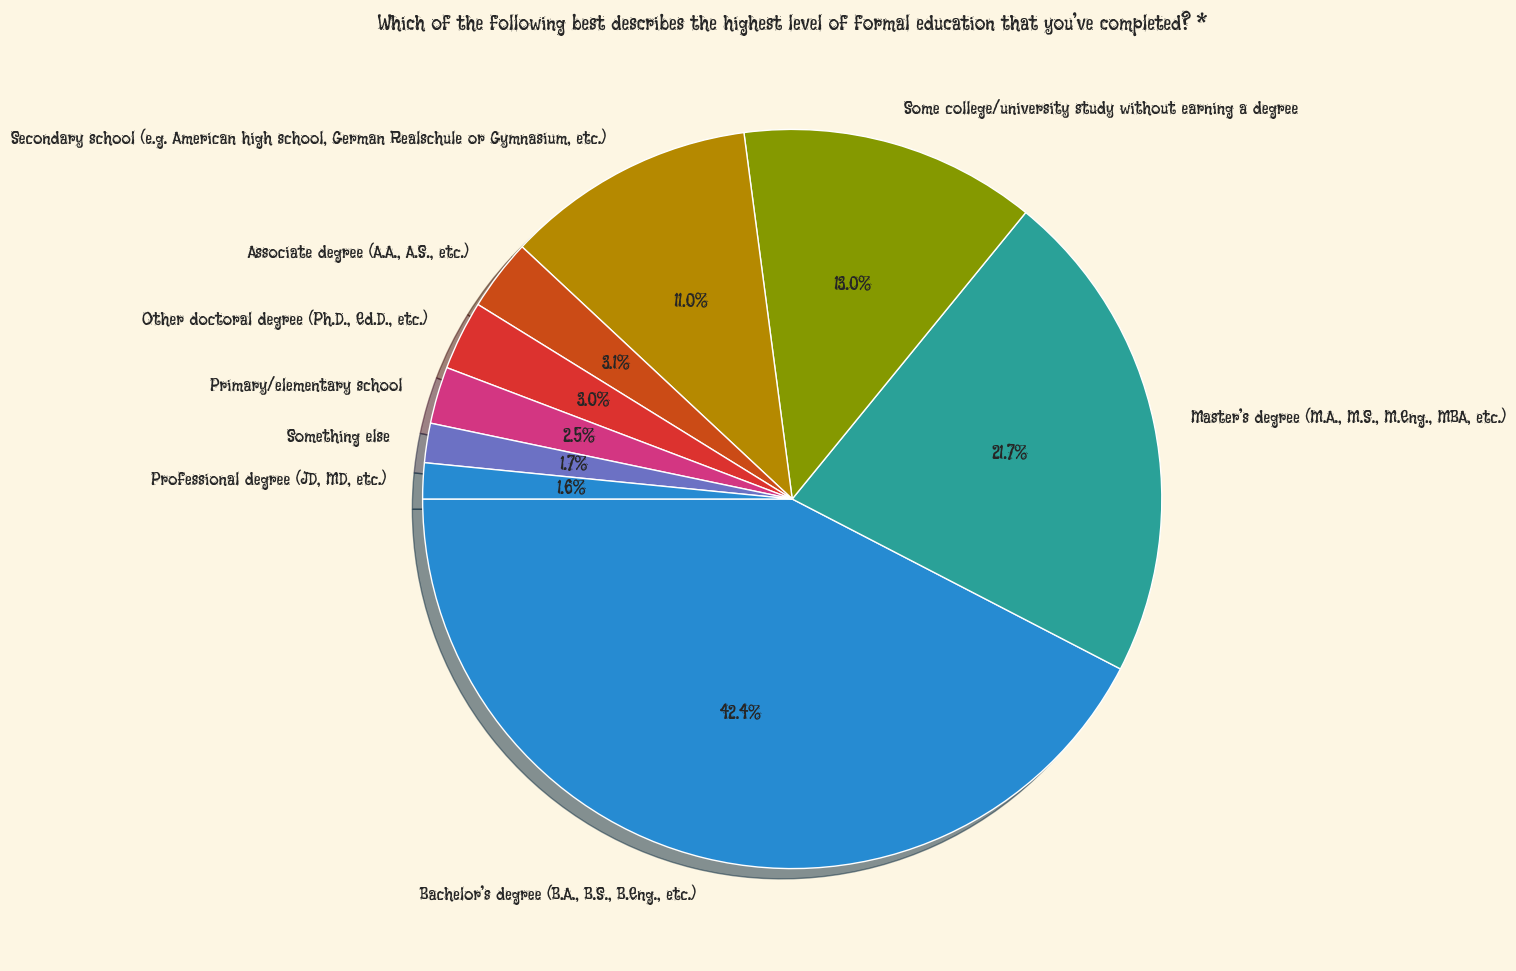

In [97]:
plt.figure(figsize=(14,12))
plt.title(survey_data_sche['EdLevel'])
plt.pie(x=survey_df.EdLevel.value_counts(),labels=[_ for _ in survey_df.EdLevel.value_counts().index], autopct = "%1.1f%%",startangle = 180,shadow=True)
plt.show()

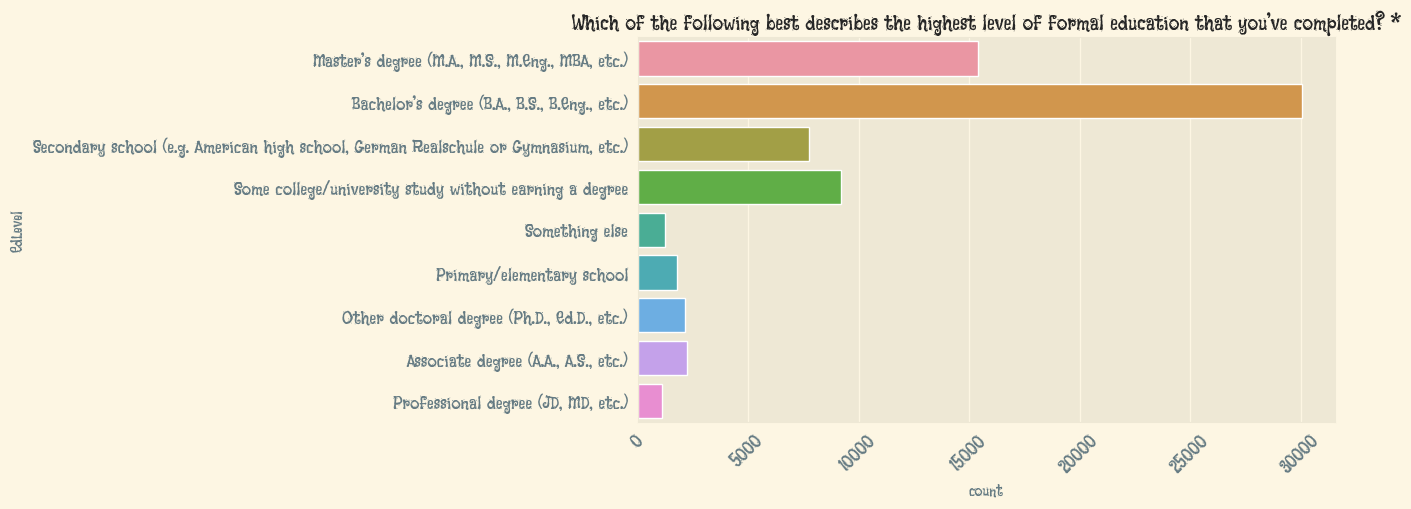

In [103]:
plt.title(survey_data_sche['EdLevel'])
sns.countplot(data=survey_df, y='EdLevel') #countplot은 data=dataframe 넣고, x나 y에는 columns명 입력!
plt.xticks(rotation=45)
plt.show()

In [118]:
(survey_df.EdLevel.value_counts()/np.sum(survey_df.EdLevel.value_counts()))*100

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.396196
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.718704
Some college/university study without earning a degree                                12.971402
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.960933
Associate degree (A.A., A.S., etc.)                                                    3.133509
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.036160
Primary/elementary school                                                              2.492981
Something else                                                                         1.724065
Professional degree (JD, MD, etc.)                                                     1.566049
Name: EdLevel, dtype: float64

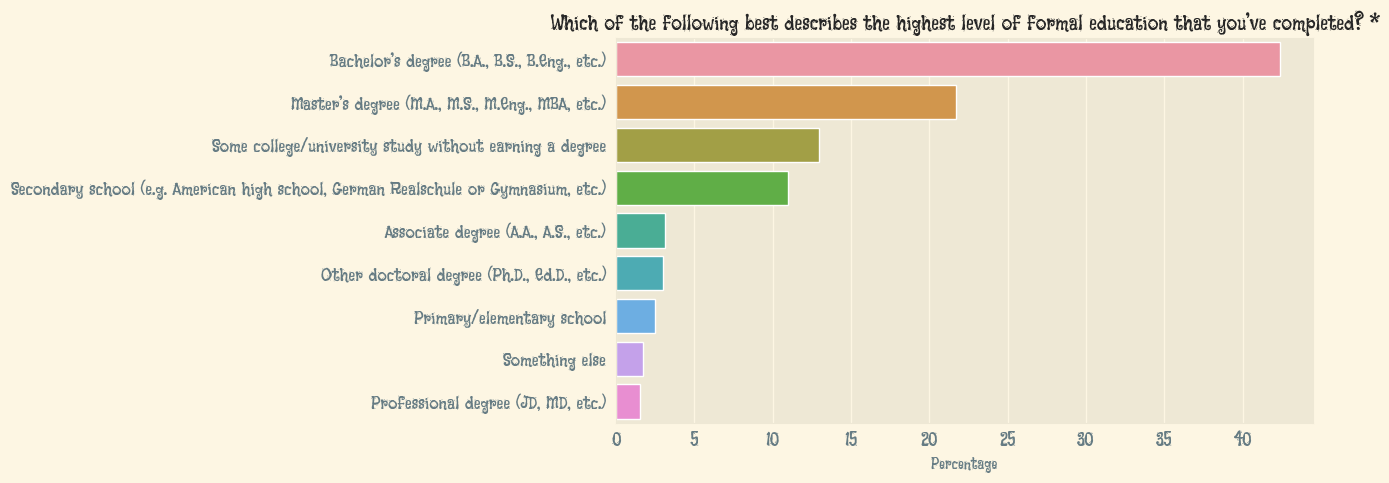

In [119]:
plt.title(survey_data_sche['EdLevel'])
sns.barplot(x=(survey_df.EdLevel.value_counts()/np.sum(survey_df.EdLevel.value_counts()))*100, y=survey_df.EdLevel.value_counts().index) #countplot은 data=dataframe 넣고, x나 y에는 columns명 입력!
plt.xlabel('Percentage')
plt.show()

In [126]:
emp = survey_df.Employment.value_counts(True)*100
emp.head(15)

Employed, full-time                                                         60.045058
Student, full-time                                                           9.381864
Independent contractor, freelancer, or self-employed                         6.957195
Employed, full-time;Independent contractor, freelancer, or self-employed     4.866235
Not employed, but looking for work                                           2.548578
Student, full-time;Employed, part-time                                       1.616446
Employed, part-time                                                          1.571388
Student, part-time                                                           1.458744
Employed, full-time;Student, full-time                                       1.353140
Employed, full-time;Student, part-time                                       1.312306
Student, part-time;Employed, part-time                                       1.009575
Student, full-time;Not employed, but looking for work 

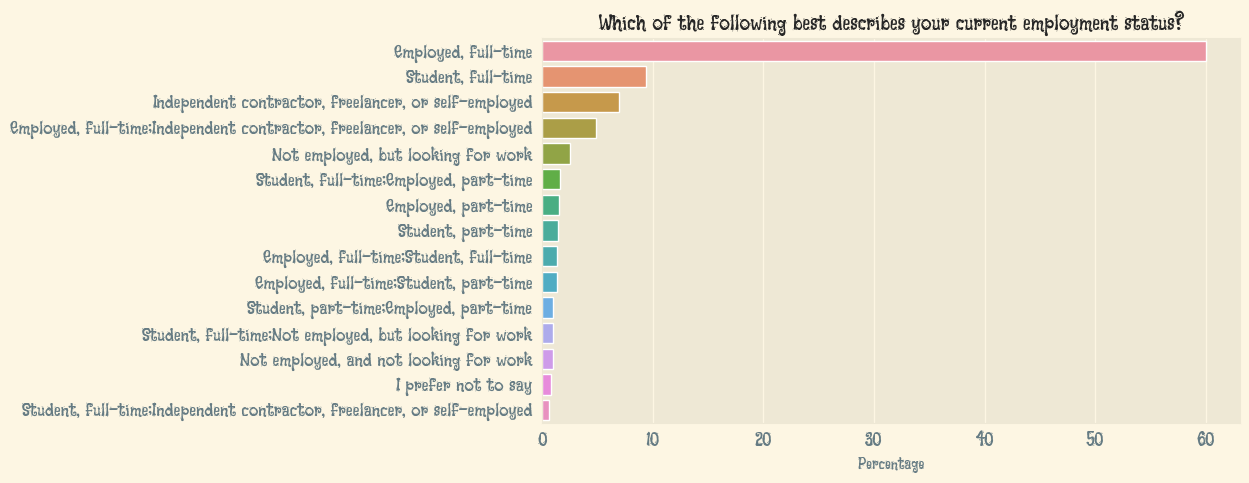

In [127]:
plt.title(survey_data_sche['Employment'])
sns.barplot(x=emp.head(15), y=emp.head(15).index) #countplot은 data=dataframe 넣고, x나 y에는 columns명 입력!
plt.xlabel('Percentage')
plt.show()